1. Suppose you have a gold/silver price dataset with a single independent variable (X) and a dependent variable (Y). You want to fit a polynomial regression model to this data. Implement the process of selecting the appropriate degree for the polynomial (e.g., linear, quadratic, cubic) based on the dataset using Python.

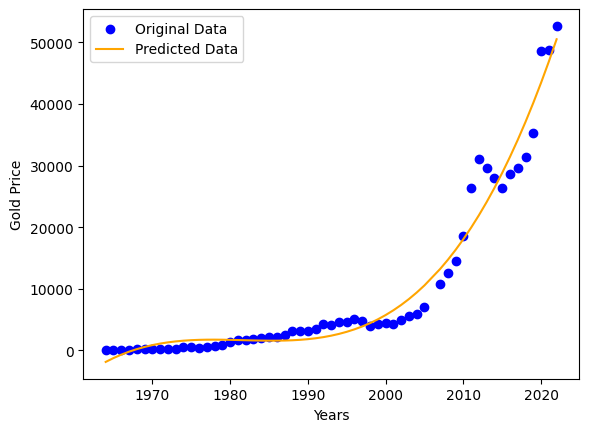

Slope coefficients: [ 0.00000000e+00  1.68691543e+00  2.23712560e+03 -1.50523173e+00
  2.84844073e-04]
Intercept:-1464151403.7649095


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('data1.csv')
df = df.drop(df.index[-1])
x,y1,y2 = df['Year '].values.reshape(-1,1),df['Gold'].values,df['Silver'].values.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
imputer.fit(y2)
y2 = imputer.transform(y2)
y2
deg = 4
poly_features = PolynomialFeatures(degree=deg)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly,y1)
y_pred = model.predict(x_poly)
plt.scatter(x,y1,label='Original Data',c = 'b')
plt.plot(x,y_pred,label='Predicted Data',c='orange')
plt.xlabel('Years')
plt.ylabel('Gold Price')
plt.legend()
plt.show()
print(f"Slope coefficients: {model.coef_}\nIntercept:{model.intercept_}")


2.Suppose you have a gold/silver price dataset with a single independent variable (X) and a dependent variable (Y). You want to fit a logistic regression model to this data. Develop an example code snippet in Python

Confusion matrix:
[[8 2]
 [0 3]]
Accuracy:0.8461538461538461
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.60      1.00      0.75         3

    accuracy                           0.85        13
   macro avg       0.80      0.90      0.82        13
weighted avg       0.91      0.85      0.86        13



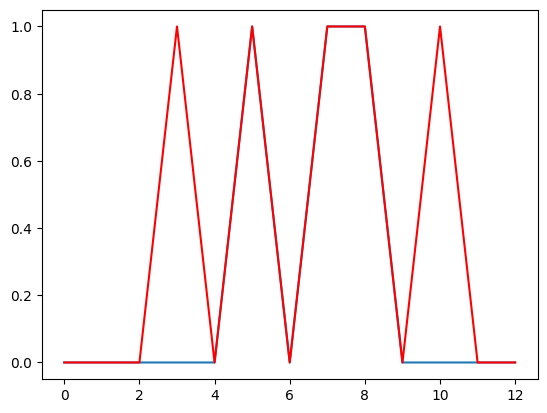

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

df = pd.read_csv('data1.csv')
df = df.drop(df.index[-1])
df = df[(df['Year '] >= 1981) & (df['Year '] <= 2022)]

x, y = df['Year '].values.reshape(-1, 1), df['Gold'].values
# Computing threshold and converting y to binary labels of y
threshold = np.mean(y)
y_binary = (y > threshold).astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.3, random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion matrix:\n{conf_mat}\nAccuracy:{accuracy}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

plt.plot(y_test)
plt.plot(y_pred,c='r')


3. Imagine you have a gold and silver price dataset with two independent variables (X1 and X2) and a dependent variable (Y). Implement in python, how you can perform multivariate polynomial regression to model the relationship between the independent variables and the dependent variable.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score,confusion_matrix
df = pd.read_csv('data1.csv')
df = df.drop(df.index[-1])
df = df[(df['Year '] >= 1981)&(df['Year '] <= 2022)]
x,y = df.iloc[:,:-1].values,df.iloc[:,-1].values
poly_features = PolynomialFeatures(degree = 3)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly,y)
y_pred = model.predict(x_poly)
print(f"Slope coefficients : {model.coef_} and Intercepts : {model.intercept_}")

Slope coefficients : [ 0.00000000e+00 -2.03408337e+02 -1.00290922e+05 -1.53754216e+01
  1.00397728e+02 -5.21039286e-02  5.09348773e-03 -2.51254139e-02
  2.60567465e-05 -6.44769863e-09] and Intercepts : 21156380.5533906


4. Imagine you have a gold and silver price dataset with two independent variables (X1 and X2) and a dependent variable (Y). Implement in python, how you can perform the logistic regression to model the relationship between the independent variables and the dependent variable

In [96]:
df = pd.read_csv('data1.csv')
df = df.drop(df.index[-1])
df = df[(df['Year '] >= 1981)&(df['Year '] <= 2022)]
x,y = df.iloc[:,0].values,df.iloc[:,1:].values
threshold = 0.5

def sigmoid(z):
    return 1/(1 + np.exp(-z))




[1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992.
 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017.
 2018. 2019. 2020. 2021. 2022.]
[[ 1670.   2715. ]
 [ 1645.   2720. ]
 [ 1800.   3105. ]
 [ 1970.   3570. ]
 [ 2130.   3955. ]
 [ 2140.   4015. ]
 [ 2570.   4794. ]
 [ 3130.   6066. ]
 [ 3140.   6755. ]
 [ 3200.   6463. ]
 [ 3466.   6646. ]
 [ 4334.   8040. ]
 [ 4140.   5489. ]
 [ 4598.   7124. ]
 [ 4680.   6335. ]
 [ 5160.   7346. ]
 [ 4725.   7345. ]
 [ 4045.   8560. ]
 [ 4234.   7615. ]
 [ 4400.   7900. ]
 [ 4300.   7215. ]
 [ 4990.   7875. ]
 [ 5600.   7695. ]
 [ 5850.  11770. ]
 [ 7000.  10675. ]
 [10800.  17405. ]
 [12500.  19520. ]
 [14500.  23625. ]
 [18500.  22165. ]
 [26400.  27255. ]
 [31050.  56900. ]
 [29600.  56290. ]
 [28006.5 54030. ]
 [26343.5 43070. ]
 [28623.5 37825. ]
 [29667.5 36990. ]
 [31438.  37825. ]
 [35220.  41400. ]
 [48651.  40600. ]
 [48720.